In [1]:
print("********************************************ANALYSIS*****************************************************************\n\n\t\t\t\tProject topic:-ONLINE PAYMENT FRAUD DETECTION \n\nTo identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.\n\n\t(1)Took Data set from kaggle \n\n\t(2) I will understand the data and look for useful insights \n\n\t(3)I will be doing Exeploratary Data Analysis if needed using Numpy,pandas,matplotlib and seaborn.\n\n\t(4)Will be making prediction models using number of machine learning regression algorithms.")


********************************************ANALYSIS*****************************************************************

				Project topic:-ONLINE PAYMENT FRAUD DETECTION 

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

	(1)Took Data set from kaggle 

	(2) I will understand the data and look for useful insights 

	(3)I will be doing Exeploratary Data Analysis if needed using Numpy,pandas,matplotlib and seaborn.

	(4)Will be making prediction models using number of machine learning regression algorithms.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("onlinefraud.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
print("*******************************************Data set description****************************************************\n\n The onlinefraud csv file contain toal 6362620 rows and 11 columns.The data contain people online transaction information right from the person who started the transaction till the person with whom tha transaction ends.\n\n The columns that specifies this information are ( step,type ,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest, isFraud ,isFlaggedFraud.)\n\n Here data type of all the columns present here are in int or float. The column nameoring,ani namedest has object data type.")


*******************************************Data set description****************************************************

 The onlinefraud csv file contain toal 6362620 rows and 11 columns.The data contain people online transaction information right from the person who started the transaction till the person with whom tha transaction ends.

 The columns that specifies this information are ( step,type ,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest, isFraud ,isFlaggedFraud.)

 Here data type of all the columns present here are in int or float. The column nameoring,ani namedest has object data type.


In [6]:
print("*****************************************************OBJECTIVE*****************************************************************\n\n\n  THE CLASSIFICATION GOAL IS TO FIND OUT WHETHER THE TRANSACTION IS FRAUD OR NOT")

*****************************************************OBJECTIVE*****************************************************************


  THE CLASSIFICATION GOAL IS TO FIND OUT WHETHER THE TRANSACTION IS FRAUD OR NOT


## what's the features means 

#step: represents a unit of time where 1 step equals 1 hour

#type: type of online transaction

#amount: the amount of the transaction

#nameOrig: customer starting the transaction

#oldbalanceOrg: balance before the transaction

#newbalanceOrig: balance after the transaction

#nameDest: recipient of the transaction

#oldbalanceDest: initial balance of recipient before the transaction

#newbalanceDest: the new balance of recipient after the transaction

#isFraud: fraud transaction



### Shape of the Data

In [7]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 6362620
Total Number of columns : 11


In [8]:
'''Shape of the dataframe is (6362620, 11). There are 6362620 rows and 11 columns in the dataset.'''

'Shape of the dataframe is (6362620, 11). There are 6362620 rows and 11 columns in the dataset.'

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###  Checking if there is any null values present in dataset

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Here total missing values count from each column is 0 and we can see there is no missing value in the dataframe


### Missing value Visualization

<AxesSubplot:>

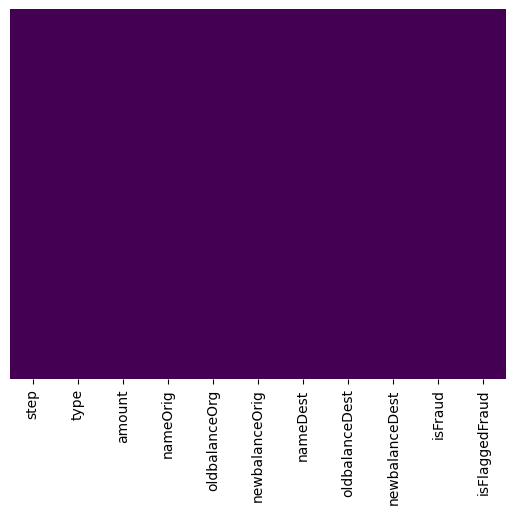

In [11]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

From the above heatmap graph we can see that there is no missing value in dataset.

### Understanding the data

In [12]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Here i'm checking all the classes present in column type which represents the type of transaction

Let's see the distribution of the transaction type by using grpah

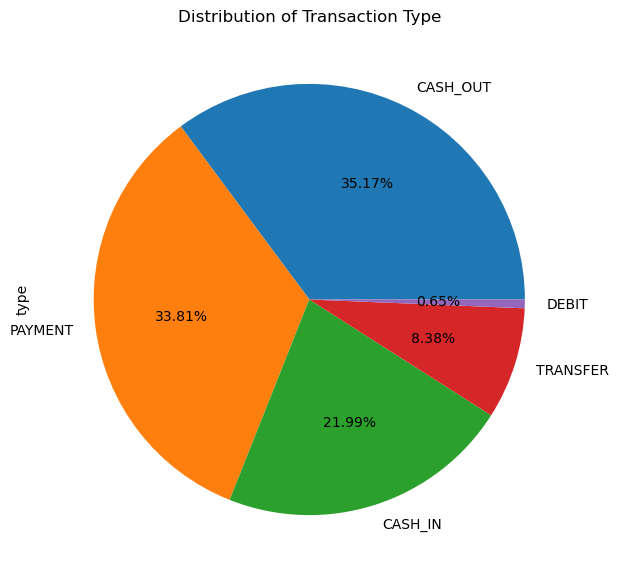

In [13]:
plt.figure(figsize=(7,7))
df['type'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Distribution of Transaction Type")
plt.show()

In [14]:
print("Here we could see the the distribution of Type of transactions are:-\n\n\t1) Payment  = 33.81%\n\n\t2) Cash Out = 35.17 %\n\n\t3) Debit    = 0.65\n\n\t4) Transfer = 8.38% \n\n\t5) Cash IN  = 21.99%\n\n\tThe highest transaction type here is Payment type and the lowest transaction type here is Debit")

Here we could see the the distribution of Type of transactions are:-

	1) Payment  = 33.81%

	2) Cash Out = 35.17 %

	3) Debit    = 0.65

	4) Transfer = 8.38% 

	5) Cash IN  = 21.99%

	The highest transaction type here is Payment type and the lowest transaction type here is Debit


## checking the target columns value counts to know the classes present in target column.

In [15]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

 Here we have 6354407 transaction values which are not a fraud and 8213 transaction values which are fraud

## Renaming nameOring to client_id for better understanding

In [16]:
df.nameOrig = df.nameOrig.str.replace('C','').astype('int')
df.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

## checking the 10 largest amount transaction

In [17]:
df.nlargest(10, 'amount')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0
3937152,286,TRANSFER,67500761.29,811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0,0
4105338,302,TRANSFER,66761272.21,420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0,0
3892529,284,TRANSFER,64234448.19,1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0,0
3991638,298,TRANSFER,63847992.58,300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0,0
4143801,303,TRANSFER,63294839.63,372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0,0


In [18]:
print("Here we could see the 10 largest amount of transfer \n\n\t1) The amount transfer by the client_id- 1715283297 is 63294839.63\n\n\t2) The amount transfer by the client_id- 2127282686 is 73823490.36\n\n\t3) The amount transfer by the client_id-2044643633  is 71172480.42 \n\n\t4) The amount transfer by the client_id- 1425667947 is 69886731.30 \n\n\t5) The amount transfer by the client_id- 1584456031 is  69337316.27\n\n\t6) The amount transfer by the client_id- 811810230 is 67500761.29\n\n\t7) The amount transfer by the client_id-420748282  is 66761272.21\n\n\t8) The amount transfer by the client_id- 1139847449 is 64234448.19 \n\n\t9) The amount transfer by the client_id-300140823  is 63847992.58 \n\n\t10) The amount transfer by the client_id- 372535854  is 92445516   ")

Here we could see the 10 largest amount of transfer 

	1) The amount transfer by the client_id- 1715283297 is 63294839.63

	2) The amount transfer by the client_id- 2127282686 is 73823490.36

	3) The amount transfer by the client_id-2044643633  is 71172480.42 

	4) The amount transfer by the client_id- 1425667947 is 69886731.30 

	5) The amount transfer by the client_id- 1584456031 is  69337316.27

	6) The amount transfer by the client_id- 811810230 is 67500761.29

	7) The amount transfer by the client_id-420748282  is 66761272.21

	8) The amount transfer by the client_id- 1139847449 is 64234448.19 

	9) The amount transfer by the client_id-300140823  is 63847992.58 

	10) The amount transfer by the client_id- 372535854  is 92445516   


## checking the type of transaction done for the largest amount transfer

In [19]:
d = df.nlargest(10, 'amount').type
d

3686583    TRANSFER
4060598    TRANSFER
4146397    TRANSFER
3946920    TRANSFER
3911956    TRANSFER
3937152    TRANSFER
4105338    TRANSFER
3892529    TRANSFER
3991638    TRANSFER
4143801    TRANSFER
Name: type, dtype: object


As we have seem earlier there are 5 types of transactions are there Payment,Cash_out, Cash_In,Debit,Transfer.Out of all of them here we could see all the transaction done by transfer transaction type

## lets check if there is any fraudulant activity happened

In [20]:
df.nlargest(10, 'amount').isFraud

3686583    0
4060598    0
4146397    0
3946920    0
3911956    0
3937152    0
4105338    0
3892529    0
3991638    0
4143801    0
Name: isFraud, dtype: int64

As we can see here there is no fraudulant activity happens in largest amount transfer

The largest 10 amount of money in transfer transactions are safed. There is no fraudulant activity detected

##  Checking the transaction type of first 100 largest amount

In [21]:
from collections import Counter

Counter(df.nlargest(100, 'amount').type)

Counter({'TRANSFER': 100})

 In the largest 100 amount the most used transaction type is Transfer type than any other transaction type

## Checking if there is any fraudulant activity is there

In [22]:
F = df.nlargest(100, 'amount').isFraud
counter = 0
if 1 in F.values:
    counter +=1
counter

0

There is no fraudulant activity is detected.
In the largets 100 amount of money it is safe and from that we can conclude that the largest amount of money the transaction nearly has more security than small amounts of money

## plotting the graph to see the where the largest amount lies

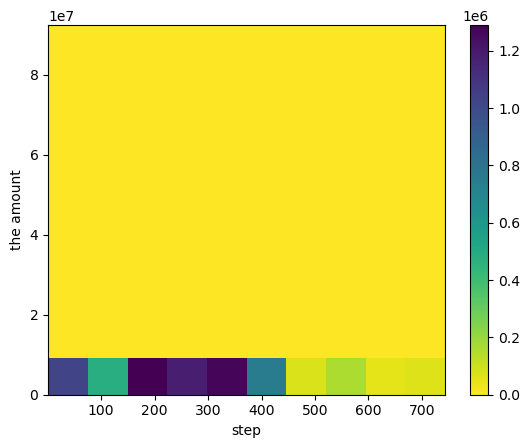

In [23]:
plt.hist2d(data= df, x = 'step', y = 'amount',cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('step')
plt.ylabel('the amount')
plt.show()

 Observatiob:--The largest amount between 200 aqnd 300 steps.


## Checking the nameDest which is the id of the recipient  client who has got most frequent transaction


In [24]:
n = 10
g=df['nameDest'].value_counts()[:n]
g

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

 Out of all here we got the top 10 most frequent client recipient id

## plotting the graph of the ids of the clients whos transactions are most frequent

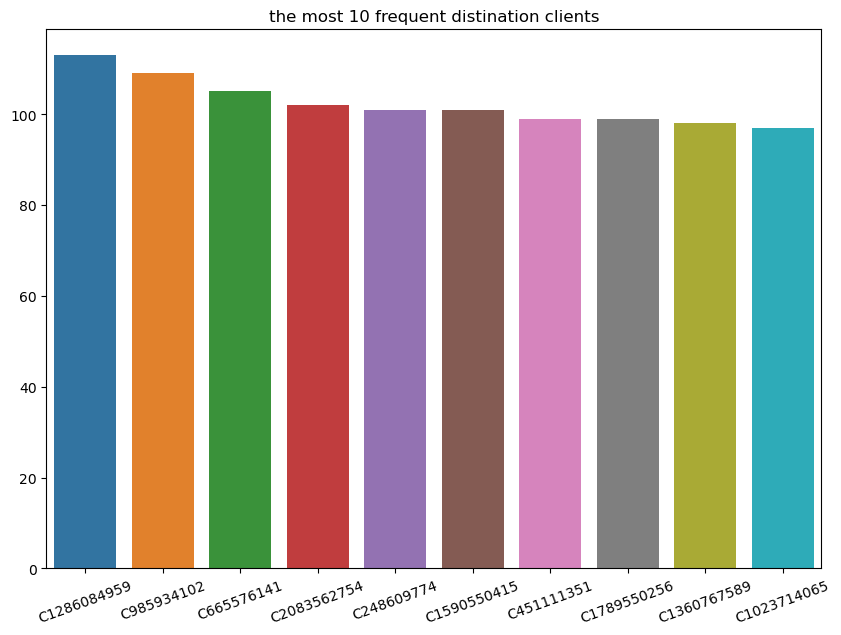

In [25]:
plt.figure(figsize = [10, 7])
sns.barplot(x = df['nameDest'].value_counts()[:n].index, y =df['nameDest'].value_counts()[:n].values)
plt.xticks(rotation = 20)
plt.title('the most 10 frequent distination clients')
plt.show()

And as we can  see here the number of times the respective client did the transaction. so now we can check if there is any fraudulent activity done by them  

## Checking all the recipients client ids of the largest amount of money transaction happend frequently are fraud or not


In [26]:
df[df.nameDest == 'C1286084959']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
93,1,TRANSFER,583848.46,1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0,0
367,1,TRANSFER,176334.26,169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0
388,1,CASH_OUT,373068.26,1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0
471,1,CASH_IN,403418.39,848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0
642,1,CASH_IN,222126.95,870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0
4832993,347,CASH_OUT,235564.75,1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0
5566959,393,CASH_IN,119568.31,1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0
5596560,394,CASH_OUT,381887.53,1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0


In [27]:
(df[df.nameDest == "C985934102"].isFraud==0).value_counts()

True    109
Name: isFraud, dtype: int64

In [28]:
df[df.nameDest == 'C985934102']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
114,1,CASH_OUT,11648.50,781091365,0.0,0.00,C985934102,260976.00,971418.91,0,0
188,1,CASH_OUT,191702.06,2052457859,0.0,0.00,C985934102,272624.50,971418.91,0,0
194,1,CASH_OUT,88834.86,938463537,0.0,0.00,C985934102,464326.57,971418.91,0,0
210,1,CASH_OUT,503333.79,1640612861,0.0,0.00,C985934102,553161.42,971418.91,0,0
285,1,CASH_OUT,202624.59,452364286,0.0,0.00,C985934102,1056495.21,971418.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3874834,283,TRANSFER,2496696.31,1636243227,0.0,0.00,C985934102,12526377.67,15023073.98,0,0
3933615,285,TRANSFER,2970995.82,979513051,0.0,0.00,C985934102,15023073.98,17994069.80,0,0
4550309,327,TRANSFER,2975990.37,376960545,0.0,0.00,C985934102,17994069.80,20970060.17,0,0
5733156,399,CASH_IN,185810.99,706764923,17003.0,202813.99,C985934102,20970060.17,20784249.18,0,0


In [29]:
df[df.nameDest == 'C1286084959']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
93,1,TRANSFER,583848.46,1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0,0
367,1,TRANSFER,176334.26,169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0
388,1,CASH_OUT,373068.26,1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0
471,1,CASH_IN,403418.39,848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0
642,1,CASH_IN,222126.95,870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0
4832993,347,CASH_OUT,235564.75,1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0
5566959,393,CASH_IN,119568.31,1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0
5596560,394,CASH_OUT,381887.53,1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0


In [30]:
(df[df.nameDest == 'C1286084959'].isFraud==0).value_counts()

True    113
Name: isFraud, dtype: int64

In [31]:
df[df.nameDest == 'C665576141']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,926859124,0.00,0.00,C665576141,29031.00,5515763.34,0,0
300,1,DEBIT,3428.95,1317375498,147798.00,144369.05,C665576141,1534657.01,5515763.34,0,0
360,1,TRANSFER,1349670.68,1419332030,0.00,0.00,C665576141,1538085.96,5515763.34,0,0
454,1,CASH_IN,156922.36,1706272858,1281862.28,1438784.65,C665576141,2887756.64,5515763.34,0,0
630,1,CASH_IN,106727.81,865858182,4927051.90,5033779.71,C665576141,2730834.27,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4021831,299,CASH_IN,39119.26,240652683,8480.00,47599.26,C665576141,27508570.06,27469450.79,0,0
4484804,324,TRANSFER,23105862.44,1179879087,0.00,0.00,C665576141,27469450.79,70994069.05,0,0
4497109,325,TRANSFER,20418755.82,890634131,392838.41,0.00,C665576141,50575313.23,70994069.05,0,0
4622556,329,CASH_OUT,306783.60,1203417664,0.00,0.00,C665576141,70994069.05,71300852.65,0,0


In [32]:
(df[df.nameDest == 'C665576141'].isFraud==0).value_counts()

True    105
Name: isFraud, dtype: int64

In [33]:
df[df.nameDest == 'C2083562754']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
169,1,CASH_OUT,89038.75,1233327519,0.00,0.00,C2083562754,189808.00,1186556.81,0,0
193,1,CASH_OUT,178439.26,1634723627,0.00,0.00,C2083562754,278846.75,1186556.81,0,0
283,1,CASH_OUT,262392.36,2069500590,0.00,0.00,C2083562754,457286.01,1186556.81,0,0
390,1,CASH_IN,228451.89,1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
527,1,CASH_OUT,195314.34,934740803,0.00,0.00,C2083562754,491226.48,1186556.81,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4308365,307,CASH_IN,143047.72,345227873,2213385.85,2356433.58,C2083562754,32442862.51,32299814.79,0,0
4357777,309,CASH_IN,39444.36,2038311171,3059547.24,3098991.60,C2083562754,32299814.79,32260370.42,0,0
4593262,328,CASH_IN,221145.16,1559357289,24316.00,245461.16,C2083562754,32260370.42,32039225.26,0,0
5330543,374,TRANSFER,7614459.07,2005206705,0.00,0.00,C2083562754,32039225.26,39653684.33,0,0


In [34]:
(df[df.nameDest == "C2083562754"].isFraud==0).value_counts()

True    102
Name: isFraud, dtype: int64

In [35]:
df[df.nameDest == 'C248609774']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89,512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
197,1,CASH_OUT,82691.56,1620409359,0.00,0.00,C248609774,657983.89,6453430.91,0,0
372,1,TRANSFER,438437.09,977160959,0.00,0.00,C248609774,740675.45,6453430.91,0,0
383,1,TRANSFER,955855.00,94830685,0.00,0.00,C248609774,1179112.54,6453430.91,0,0
802,1,TRANSFER,969631.31,2144067911,0.00,0.00,C248609774,2134967.54,6453430.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4476709,324,CASH_IN,281867.16,1483653893,4165861.47,4447728.63,C248609774,26726346.35,26444479.20,0,0
4748477,333,TRANSFER,707741.52,1489120585,0.00,0.00,C248609774,26444479.20,27152220.72,0,0
5118049,356,CASH_IN,20470.18,211118418,55073.00,75543.18,C248609774,27152220.72,27131750.54,0,0
5404769,377,CASH_IN,173399.60,1684616792,11112856.30,11286255.90,C248609774,27131750.54,26958350.93,0,0


In [36]:
(df[df.nameDest == "C248609774"].isFraud==0).value_counts()

True    101
Name: isFraud, dtype: int64

In [37]:
df[df.nameDest == 'C1590550415']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84,1,TRANSFER,379856.23,1449772539,0.00,0.00,C1590550415,900180.00,19169204.93,0,0
88,1,TRANSFER,761507.39,412788346,0.00,0.00,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,1520267010,0.00,0.00,C1590550415,2041543.62,19169204.93,0,0
94,1,TRANSFER,1724887.05,1495608502,0.00,0.00,C1590550415,3470595.10,19169204.93,0,0
96,1,TRANSFER,581294.26,843299092,0.00,0.00,C1590550415,5195482.15,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4054753,300,CASH_OUT,419640.73,866077160,0.00,0.00,C1590550415,27377616.86,27797257.59,0,0
4260486,306,CASH_IN,151252.31,1590495274,872.00,152124.31,C1590550415,27797257.59,27646005.28,0,0
4601350,329,CASH_OUT,324673.50,1473396395,104257.00,0.00,C1590550415,27646005.28,27970678.78,0,0
5795619,401,CASH_OUT,239378.92,1876585826,0.00,0.00,C1590550415,27970678.78,28210057.70,0,0


In [38]:
(df[df.nameDest == "C1590550415"].isFraud==0).value_counts()

True    101
Name: isFraud, dtype: int64

In [39]:
df[df.nameDest == 'C451111351']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
132,1,TRANSFER,679502.24,722417467,290.0,0.00,C451111351,171866.00,3940085.21,0,0
200,1,CASH_OUT,271002.70,500618423,0.0,0.00,C451111351,851368.24,3940085.21,0,0
217,1,CASH_OUT,171369.73,2123222442,0.0,0.00,C451111351,1122370.94,3940085.21,0,0
236,1,TRANSFER,480222.51,201677908,11110.0,0.00,C451111351,1293740.67,3940085.21,0,0
365,1,TRANSFER,1123206.66,967677821,0.0,0.00,C451111351,1773963.18,3940085.21,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3988910,298,CASH_OUT,97371.91,1065586821,10916.0,0.00,C451111351,18333611.26,18430983.17,0,0
4410728,322,CASH_IN,203429.37,861488915,22701.0,226130.37,C451111351,18430983.17,18227553.79,0,0
4574276,328,CASH_OUT,308790.96,476309364,0.0,0.00,C451111351,18227553.79,18536344.75,0,0
5001123,353,CASH_IN,229471.04,563362567,9065.0,238536.04,C451111351,18536344.75,18306873.71,0,0


In [40]:
(df[df.nameDest == "C451111351"].isFraud==0).value_counts()

True    99
Name: isFraud, dtype: int64

In [41]:
df[df.nameDest == 'C1789550256']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
208,1,CASH_OUT,73464.06,307488715,0.00,0.00,C1789550256,4.447790e+05,4.619799e+06,0,0
279,1,CASH_OUT,369989.20,1936550492,9515.86,0.00,C1789550256,5.182431e+05,4.619799e+06,0,0
361,1,TRANSFER,314403.14,1262110193,0.00,0.00,C1789550256,8.882322e+05,4.619799e+06,0,0
483,1,CASH_IN,152823.85,365625031,6565786.32,6718610.17,C1789550256,1.202635e+06,4.619799e+06,0,0
658,1,CASH_IN,336298.77,1533330615,8570318.60,8906617.38,C1789550256,1.049812e+06,4.619799e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4143068,303,TRANSFER,45372634.63,240100497,5819.77,0.00,C1789550256,9.404946e+07,1.394221e+08,0,0
4153595,303,TRANSFER,19712162.15,1418395176,135212.13,0.00,C1789550256,1.394221e+08,1.591343e+08,0,0
4932275,350,CASH_IN,224586.47,392345472,58452.00,283038.47,C1789550256,1.591343e+08,1.589097e+08,0,0
6013169,448,CASH_IN,228898.85,1205150877,8821004.77,9049903.62,C1789550256,1.589097e+08,1.586808e+08,0,0


In [42]:
(df[df.nameDest == "C1789550256"].isFraud==0).value_counts()

True    99
Name: isFraud, dtype: int64

In [43]:
df[df.nameDest == 'C1360767589']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
180,1,CASH_OUT,190445.51,1760219993,0.00,0.0,C1360767589,203679.00,2107965.39,0,0
199,1,CASH_OUT,187728.59,264978436,0.00,0.0,C1360767589,394124.51,2107965.39,0,0
213,1,CASH_OUT,26759.05,746280996,0.00,0.0,C1360767589,581853.10,2107965.39,0,0
288,1,CASH_OUT,498960.91,1957078537,0.00,0.0,C1360767589,608612.15,2107965.39,0,0
290,1,CASH_OUT,58820.08,594858858,0.00,0.0,C1360767589,1107573.06,2107965.39,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3994488,298,CASH_OUT,283709.38,982428624,0.00,0.0,C1360767589,25778572.34,26062281.71,0,0
5001355,353,TRANSFER,1049489.06,1433486402,0.00,0.0,C1360767589,26062281.71,27043498.50,0,0
5014239,353,CASH_IN,68272.26,358251276,8718426.14,8786698.4,C1360767589,27111770.77,27043498.50,0,0
5676991,397,CASH_OUT,5622.32,257220680,0.00,0.0,C1360767589,27043498.50,27049120.83,0,0


In [44]:
(df[df.nameDest == "C1360767589"].isFraud==0).value_counts()

True    98
Name: isFraud, dtype: int64

In [45]:
df[df.nameDest == 'C1023714065']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
161,1,CASH_OUT,289645.52,1446001495,0.00,0.00,C1023714065,871442.79,1412484.09,0,0
184,1,CASH_OUT,151829.91,873309260,0.00,0.00,C1023714065,1161088.31,1412484.09,0,0
451,1,CASH_IN,74933.22,379124840,1080930.07,1155863.30,C1023714065,1312918.22,1412484.09,0,0
480,1,CASH_IN,273305.73,192456457,5912480.60,6185786.33,C1023714065,1237985.00,1412484.09,0,0
637,1,CASH_IN,198847.32,1088491512,6157562.25,6356409.58,C1023714065,964679.26,1412484.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5416482,378,CASH_IN,97261.19,290300334,60.00,97321.19,C1023714065,20222310.22,20125049.03,0,0
5549360,382,TRANSFER,4082094.44,1831331937,119316.51,0.00,C1023714065,20125049.03,24207143.47,0,0
5630628,395,CASH_IN,76987.52,2106303292,202478.00,279465.52,C1023714065,24207143.47,24130155.95,0,0
5806705,401,TRANSFER,3564352.43,1971571283,0.00,0.00,C1023714065,24130155.95,27854824.46,0,0


In [46]:
(df[df.nameDest == "C1023714065"].isFraud==0).value_counts()

True    97
Name: isFraud, dtype: int64

In [47]:
g

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [48]:
g

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

## Observation :-

In [49]:
print("\n\n\t1)client id = C1286084959 : The number of transactions done are 113 and there is no fraudulent activity detected\n\n\t2)client id = C985934102 : The number of transactions done are 109 and there is no fraudulent activity detected\n\n\t3)client id = C665576141 : The number of transactions done are 105 and there is no fraudulent activity detected\n\n\t4) client id = C2083562754 : The number of transactions done are 102 and there is no fraudulent activity detected\n\n\t5) client id = C248609774 : The number of transactions done are 101 and there is no fraudulent activity detected\n\n\t6)client id = C1590550415 : The number of transactions done are 101 and there is no fraudulent activity detected\n\n\t7) client id = C451111351 : The number of transactions done are 99 and there is no fraudulent activity detected\n\n\t8) client id = C1789550256 : The number of transactions done are 99 and there is no fraudulent activity detected\n\n\t9) client id = C1360767589 : The number of transactions done are 98 and there is no fraudulent activity detected\n\n\t10) client id = C1023714065 : The number of transactions done are 97 and there is no fraudulent activity detected")



	1)client id = C1286084959 : The number of transactions done are 113 and there is no fraudulent activity detected

	2)client id = C985934102 : The number of transactions done are 109 and there is no fraudulent activity detected

	3)client id = C665576141 : The number of transactions done are 105 and there is no fraudulent activity detected

	4) client id = C2083562754 : The number of transactions done are 102 and there is no fraudulent activity detected

	5) client id = C248609774 : The number of transactions done are 101 and there is no fraudulent activity detected

	6)client id = C1590550415 : The number of transactions done are 101 and there is no fraudulent activity detected

	7) client id = C451111351 : The number of transactions done are 99 and there is no fraudulent activity detected

	8) client id = C1789550256 : The number of transactions done are 99 and there is no fraudulent activity detected

	9) client id = C1360767589 : The number of transactions done are 98 and there i

 I have checked if there is any fraudulent activity detected in all the transactions the clients did.There is no fraudulent activity detected in any single transaction

Great in spite of that the client frequent transactions are of maximum times but no fraudulent activity in transaction detected 

## Checking the values in target columns present

In [50]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

 
There are 6354407 values present which are True meaning that they are Non-Fraudulent and 8213 values present which are False meaning that they are Fraudulent

# EDA

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   client_id       int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


In [52]:
print("*******************************************Data set description****************************************************\n\n The onlinefraud csv file contain toal 6362620 rows and 11 columns.The data contain people online transaction information right from the person who started the transaction till the person with whom tha transaction ends.\n\n The columns that specifies this information are ( step,type ,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest, isFraud ,isFlaggedFraud.)\n\n Here data type of all the columns present here are in int or float. The column nameoring,ani namedest has object data type.")

*******************************************Data set description****************************************************

 The onlinefraud csv file contain toal 6362620 rows and 11 columns.The data contain people online transaction information right from the person who started the transaction till the person with whom tha transaction ends.

 The columns that specifies this information are ( step,type ,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest, isFraud ,isFlaggedFraud.)

 Here data type of all the columns present here are in int or float. The column nameoring,ani namedest has object data type.


In [53]:
df.isnull().sum()

step              0
type              0
amount            0
client_id         0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 As we have alredy seen that there is no null values present in dataset

## Encoding 

In [54]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes(["int64","float64"])

In [55]:
df_cat

,type,nameDest
0,PAYMENT,M1979787155
1,PAYMENT,M2044282225
2,TRANSFER,C553264065
3,CASH_OUT,C38997010
4,PAYMENT,M1230701703
...,...,...
6362615,CASH_OUT,C776919290
6362616,TRANSFER,C1881841831
6362617,CASH_OUT,C1365125890
6362618,TRANSFER,C2080388513


Here I have seperated the categorial columns in order to encode the values present in for further data processing.With the help of seelect_dtype fuction i have seperated 3 categorical columns which are as following :- 1)"Type", 2)NameOrig, 3)nameDest,respectively.

In [56]:
df_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


 Here I have seperated the numerical columns for further data processing.With the help of seelect_dtype fuction i have seperated 8 numeriacal columns which are as following :- 1)step, 2)amount, 3)oldbalanceOrg,4)newbalanceOrig,5)oldbalanceDest,6)newbalanceDest,7)isFraud,8)isFlaggedFraud,respectively.


## Encoding the data of categorical columns

In [57]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [58]:
df

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


 In categorical columns we got three columns Type, NameOrig and NameDest. Now here i have encoded the categorical column name Type because we only going to need that column for dataprocessing not all.

In [59]:
df_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [60]:
print("************************************************************************************************************************\n\n After succesfully seperating the column we are going to check the skewness of all the features present in dataset\n\n As per the rule we can only check the skewness of numerical values present in data set,but some of the features are present in categorical format. in order to check their skewness we need to encode there values in numerical form.\n\n So as to check the skewness of every fearure that are numerical as well as categorica I have seperated the categorical column and encoded them succsesfully\n\nNow lets check the skewness of all the features present in dataset")

************************************************************************************************************************

 After succesfully seperating the column we are going to check the skewness of all the features present in dataset

 As per the rule we can only check the skewness of numerical values present in data set,but some of the features are present in categorical format. in order to check their skewness we need to encode there values in numerical form.

 So as to check the skewness of every fearure that are numerical as well as categorica I have seperated the categorical column and encoded them succsesfully

Now lets check the skewness of all the features present in dataset


## checking the skewness

In [61]:
from scipy.stats import skew

 To check the skewness of the features im importing the module Skew from the library scipy.stats

step
0.3751768000211631


<Figure size 640x480 with 0 Axes>

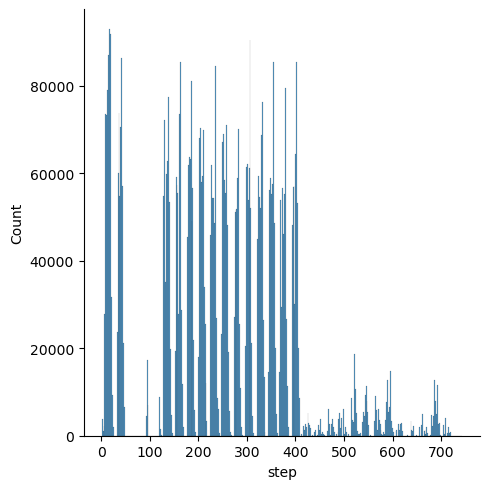

amount
30.99394217560623


<Figure size 640x480 with 0 Axes>

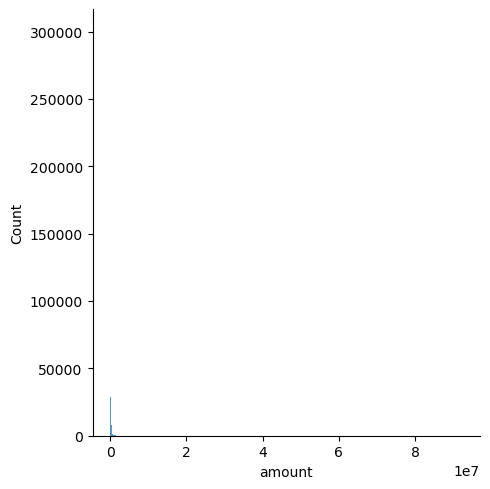

oldbalanceOrg
5.249135183108952


<Figure size 640x480 with 0 Axes>

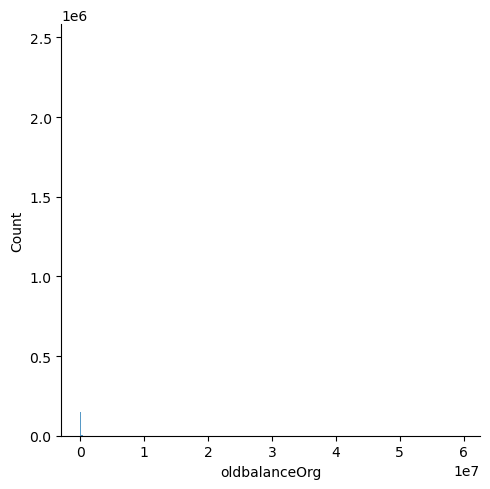

newbalanceOrig
5.176882780698714


<Figure size 640x480 with 0 Axes>

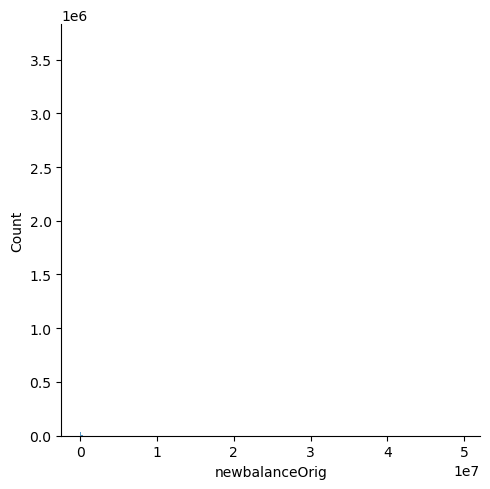

oldbalanceDest
19.921753219197708


<Figure size 640x480 with 0 Axes>

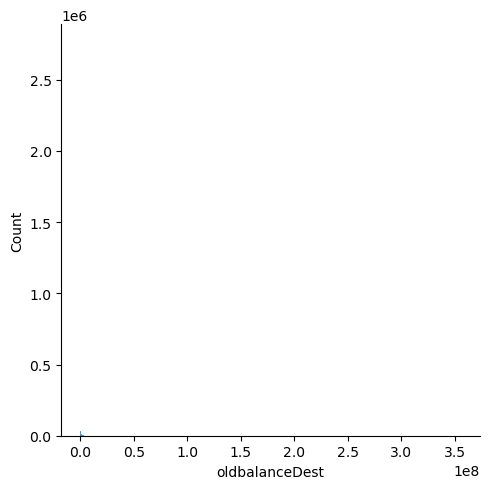

newbalanceDest
19.35229749531714


<Figure size 640x480 with 0 Axes>

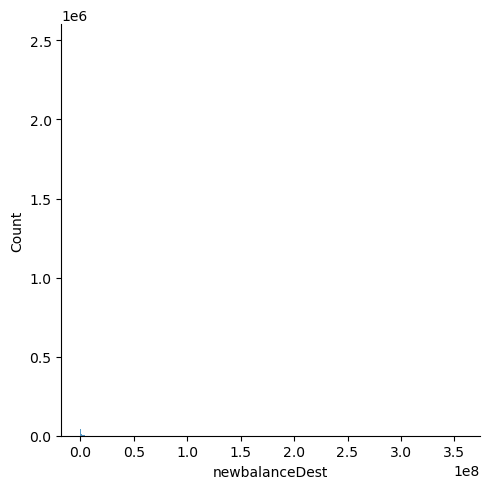

isFraud
27.779531603983045


<Figure size 640x480 with 0 Axes>

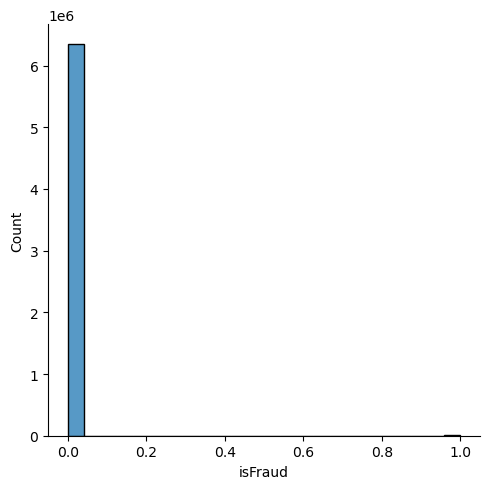

isFlaggedFraud
630.6034808043164


<Figure size 640x480 with 0 Axes>

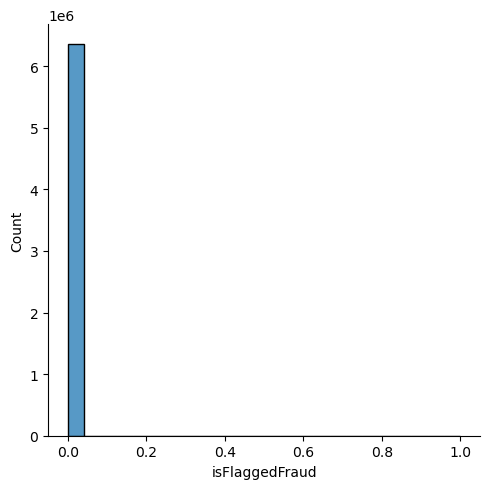

In [62]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.displot(df_num[col])
    plt.show()

 Here we got the skewed value of every feature 

In [63]:
print("*****************************************Values of skewness*****************************************************\n\n\t1)Step\nThe skewness of feature step is :-0.3751768000211631\nThe feature step has no skewness meaning the data present in step is normally distributed \n\n\t2)Amount\nThe skewness of feature amount is :-30.99394217560623 \nThe feature Amount is highly skewed meaning the data present in Amount feature is not normally distributed\nIt is also called as positively skewed data.\n\n\t3)OldbalanceOrg\nThe skewness of feature OldbalanceOrg is :-5.249135183108952 \nThe feature OldbalanceOrg is highly skewed meaning the data present in OldbalanceOrg feature is not normally distributed\nIt is also called as positively skewed data.\n\n\t4)NewbalanceOrig\nThe skewness of feature ewbalanceOrig is :- 5.176882780698714 \nThe feature NewbalanceOrig is highly skewed meaning the data present in NewbalanceOrig feature is not normally distributed\nIt is also called as positively skewed data.\n\n\t5)oldbalanceDest\nThe skewness of feature oldbalanceDest is :- 19.921753219197708 \nThe feature oldbalanceDest is highly skewed meaning the data present in oldbalanceDest feature is not normally distributed\nIt is also called as positively skewed data.\n\n\t6)newbalanceDest\nThe skewness of feature newbalanceDest is :- 19.35229749531714 \nThe feature newbalanceDest is highly skewed meaning the data present in newbalanceDest feature is not normally distributed\nIt is also called as positively skewed data.\n\n\t7)isFraud\nThe skewness of feature isFraud is :- 27.779531603983045 \nThe feature isFraud is highly skewed meaning the data present in isFraud feature is not normally distributed\nIt is also called as positively skewed data.")

*****************************************Values of skewness*****************************************************

	1)Step
The skewness of feature step is :-0.3751768000211631
The feature step has no skewness meaning the data present in step is normally distributed 

	2)Amount
The skewness of feature amount is :-30.99394217560623 
The feature Amount is highly skewed meaning the data present in Amount feature is not normally distributed
It is also called as positively skewed data.

	3)OldbalanceOrg
The skewness of feature OldbalanceOrg is :-5.249135183108952 
The feature OldbalanceOrg is highly skewed meaning the data present in OldbalanceOrg feature is not normally distributed
It is also called as positively skewed data.

	4)NewbalanceOrig
The skewness of feature ewbalanceOrig is :- 5.176882780698714 
The feature NewbalanceOrig is highly skewed meaning the data present in NewbalanceOrig feature is not normally distributed
It is also called as positively skewed data.

	5)oldbalanceDest
T

## OBSERVATION :-

Over here we could see the step column has good skewness and the rest of the columns along with target column are highly skewed. so before removing the skewness of the columns lets see the correlation between the feature and columns

## Checking Correlation

In [64]:
df_num.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


## Plotting the graph for better understanding

<AxesSubplot:>

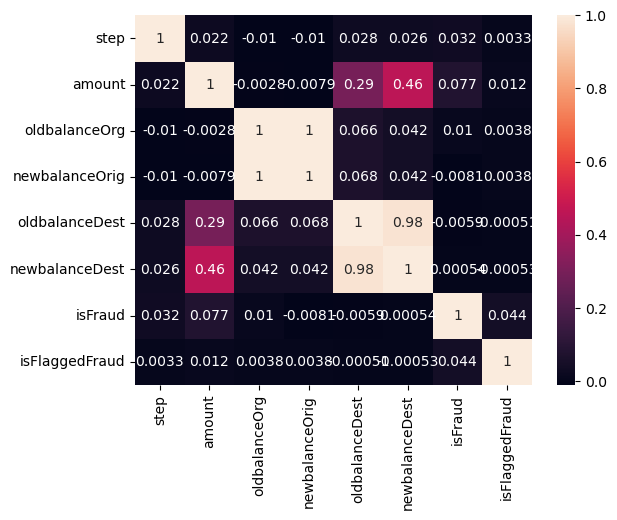

In [65]:
sns.heatmap(df_num.corr(),annot=True)

From the graph we can conclude that not a single column has good correlation with target column.so lets remove the skewness of all the columns.

## Observation :-

In [66]:
print("With help of corr function im checking the correlation of all the features with target columns.\n\n As per the values in correlation table we can conclude that the correlation of feature step with target column isFraud is bad but we have normally distributed data of step so we will not remove the skewness of step.\n\n The correlation of amount with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.\n\n The correlation of oldbalanceOrg with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature\n\n The correlation of newbalanceOrig with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.\n\n The correlation of oldbalanceDest with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.\n\n The correlation of newbalanceDest with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.")


With help of corr function im checking the correlation of all the features with target columns.

 As per the values in correlation table we can conclude that the correlation of feature step with target column isFraud is bad but we have normally distributed data of step so we will not remove the skewness of step.

 The correlation of amount with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.

 The correlation of oldbalanceOrg with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature

 The correlation of newbalanceOrig with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.

 The correlation of oldbalanceDest with target column is bad and also the data is highly positive so we need to remove the sskewness of this feature.

 The correlation of newbalanceDest with target column is bad and also the data is highly po

## Removing skewness

In [67]:
df_nums=df_num[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]

In [68]:
df_nums

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


In [69]:
for col in df_nums:
    df_nums[col]=np.sqrt(df_num[col])

In [70]:
print("****************************************OBSERVATION*******************************************************************\n\n We have log transformation and squreroot transformation to reduce the skewness.Here i am applying the squareroot transformation to reduce the skewness of the features") 

****************************************OBSERVATION*******************************************************************

 We have log transformation and squreroot transformation to reduce the skewness.Here i am applying the squareroot transformation to reduce the skewness of the features


In [71]:
df_numeric=[]
for col in df_nums:
    print(col)
    df_numeric.append(skew(df_nums[col]))
    
print(df_numeric)

amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud
[3.661257023303042, 3.0410435775848352, 2.941776707459451, 2.3663369984028937, 2.330442948034487, 27.779531603983045, 630.6034808043164]


## Dropping the column that are not necesssory 

In [72]:
df.drop(["client_id","nameDest","isFlaggedFraud","oldbalanceDest","newbalanceDest","isFlaggedFraud"],axis=1,inplace=True)

In [73]:
 print("Here i am dropping the columns(client_id,nameDest,isFlaggedFraud,oldbalanceDest,newbalanceDest)\n\n client_id,because we do not need this column in computation as it not gonna help by any means.\n\n nameDest,this column again represent the name of the client who started the transaction so we will not need the column for computation purpose.\n\n isFlaggedFraud,this feature is duplicate column as isFraud so i do not need it.oldbalanceDest,This feature column represents the old amount present in receipient account and we not actually need it for computational purpose as it does not add any value .\n\n newbalanceDest, we do not need this feature column as it does not add any value and  is not necessary for computtional purpose")

Here i am dropping the columns(client_id,nameDest,isFlaggedFraud,oldbalanceDest,newbalanceDest)

 client_id,because we do not need this column in computation as it not gonna help by any means.

 nameDest,this column again represent the name of the client who started the transaction so we will not need the column for computation purpose.

 isFlaggedFraud,this feature is duplicate column as isFraud so i do not need it.oldbalanceDest,This feature column represents the old amount present in receipient account and we not actually need it for computational purpose as it does not add any value .

 newbalanceDest, we do not need this feature column as it does not add any value and  is not necessary for computtional purpose


In [74]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,3,9839.64,170136.00,160296.36,0
1,1,3,1864.28,21249.00,19384.72,0
2,1,4,181.00,181.00,0.00,1
3,1,1,181.00,181.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0
...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,1
6362616,743,4,6311409.28,6311409.28,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,1
6362618,743,4,850002.52,850002.52,0.00,1


### data preprocessing

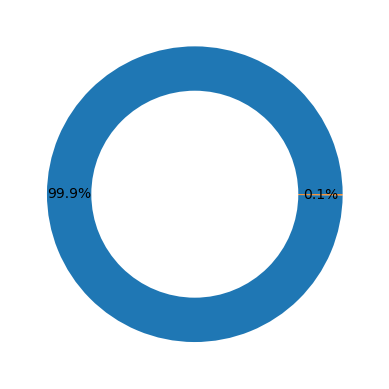

In [75]:
plt.pie(df.isFraud.value_counts(),autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

 Here i plotted a graph to show the percentage share of the different class

## Observation:-

Here we could clearly see that the data is highly imbalance so in order to make correct predictions we need to balance the data

## Using under sampling technique to balance the data

In [76]:
#class_count
class_0_count, class_1_count = df['isFraud'].value_counts()

# seperate the class
class_0= df[df['isFraud']==0]
class_1=df[df['isFraud']==1]
print("class_0 =",class_0.shape)
print("class_1 =",class_1.shape)

class_0 = (6354407, 6)
class_1 = (8213, 6)


In [77]:
class_0_count,class_1_count

(6354407, 8213)

 OBSERVATION :-  After seperating the class sucessfuly,As we can see in target column the class 0 or non fraudulent class has the highest values and the class 1 or fraudulent class has the minimum values 

 Using under sampling i segregated the data in equal part

## plotting the graph to visualise the data after balancing the data by under sampling

Total_class_of 1 and 0 : 0    8213
1    8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'count/(target)'}>

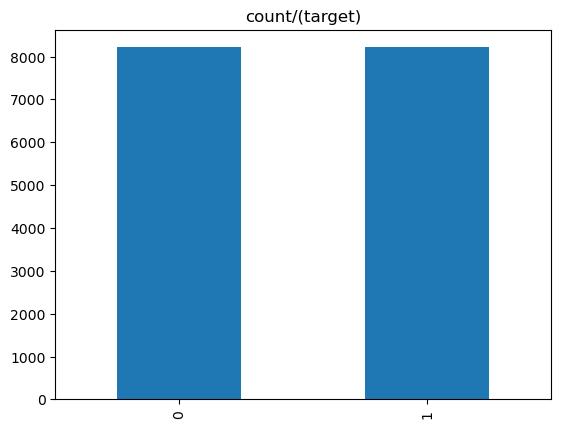

In [78]:
class_0_under= class_0.sample(class_1_count) # under sampling

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("Total_class_of 1 and 0 :",balancing_data["isFraud"].value_counts())


    
balancing_data["isFraud"].value_counts().plot(kind="bar", title="count/(target)")


## Adding a new column which shows the difference amount in transaction

In [79]:
balance_diff = balancing_data.oldbalanceOrg - balancing_data.newbalanceOrig

In [80]:
balancing_data.insert(5,"balance_diff",balance_diff)

## forming a new dataset

In [81]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 3173502 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int32  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   balance_diff    16426 non-null  float64
 6   isFraud         16426 non-null  int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 962.5 KB


## splitting of data into X and Y

In [82]:
balancing_data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'balance_diff', 'isFraud'],
      dtype='object')

In [83]:
x = balancing_data.iloc[:,:-1]
y = balancing_data['isFraud']

In [84]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,balance_diff
3173502,238,0,170495.91,2916.00,173411.91,-170495.91
5609553,394,3,69372.71,50695.00,0.00,50695.00
6194970,573,1,229438.77,0.00,0.00,0.00
956075,44,4,154645.27,23200.56,0.00,23200.56
3364505,254,3,12637.96,0.00,0.00,0.00
...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,6311409.28
6362617,743,1,6311409.28,6311409.28,0.00,6311409.28
6362618,743,4,850002.52,850002.52,0.00,850002.52


In [85]:
y

3173502    0
5609553    0
6194970    0
956075     0
3364505    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64

## Training the model

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [88]:
!pip install xgboost

### Importing all the algorithm necessory to build the model and to check which one give better prediction

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

In [90]:
print("*****************************************************************************************************************\n\nHere i have imported all the algorithm that i will be applying on my model that i have created.\n\n The algorithm i will be applying on my model are as following :-\n LogisticRegression()\n KNeighborsClassifier()\n DecisionTreeClassifier()\n RandomForestClassifier()\n XGBClassifier()\n Naive Bayes()\n support vector machine()")

*****************************************************************************************************************

Here i have imported all the algorithm that i will be applying on my model that i have created.

 The algorithm i will be applying on my model are as following :-
 LogisticRegression()
 KNeighborsClassifier()
 DecisionTreeClassifier()
 RandomForestClassifier()
 XGBClassifier()
 Naive Bayes()
 support vector machine()


In [91]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()}

## Applying all the possible model to check the accuracy prediction

In [92]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    
    print(classification_report(y_test,y_pred))
    
    print('*******************************************************')

Training Model LR 
-----------------
Training Accuracy: 0.9049467275494673
Testing Accuracy: 0.8959220937309799
Testing Confusion Matrix: 
[[1580   63]
 [ 279 1364]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1643
           1       0.96      0.83      0.89      1643

    accuracy                           0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286

*******************************************************
Training Model KNN 
-----------------
Training Accuracy: 0.9763318112633181
Testing Accuracy: 0.9659160073037127
Testing Confusion Matrix: 
[[1563   80]
 [  32 1611]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1643
           1       0.95      0.98      0.97      1643

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg

# Model Scoring

In [103]:
print("For Logistic Regression WE got the result :\n\n 1. Accuracy :: 0.90%\n\n2. Re-call :: 0.96%\n\n3. Precision :: 0.85%\n\n4. F1-Score :: 0.90%")

For Logistic Regression WE got the result :

 1. Accuracy :: 0.90%

2. Re-call :: 0.96%

3. Precision :: 0.85%

4. F1-Score :: 0.90%


In [104]:
print("For KNeighborsClassifier WE got the result :\n\n 1. Accuracy :: 0.97%\n\n2. Re-call :: 0.95%\n\n3. Precision :: 0.98%\n\n4. F1-Score :: 0.97%")

For KNeighborsClassifier WE got the result :

 1. Accuracy :: 0.97%

2. Re-call :: 0.95%

3. Precision :: 0.98%

4. F1-Score :: 0.97%


In [105]:
print("For DecisionTreeClassifier WE got the result :\n\n 1. Accuracy :: 0.99%\n\n2. Re-call :: 0.98%\n\n3. Precision :: 0.99%\n\n4. F1-Score :: 0.99%")

For DecisionTreeClassifier WE got the result :

 1. Accuracy :: 0.99%

2. Re-call :: 0.98%

3. Precision :: 0.99%

4. F1-Score :: 0.99%


In [106]:
print("For RandomForestClassifier WE got the result :\n\n 1. Accuracy :: 0.97%\n\n2. Re-call :: 0.97%\n\n3. Precision :: 96.00%\n\n4. F1-Score :: 0.97%")

For RandomForestClassifier WE got the result :

 1. Accuracy :: 0.97%

2. Re-call :: 0.97%

3. Precision :: 96.00%

4. F1-Score :: 0.97%


In [97]:
print("For XGBClassifier WE got the result :\n\n 1. Accuracy :: 0.99%\n\n2. Re-call :: 0.99%\n\n3. Precision :: 1.00%\n\n4. F1-Score :: 0.99%")

For XGBClassifier WE got the result :

 1. Accuracy :: 0.99%

2. Re-call :: 0.99%

3. Precision :: 1.00%

4. F1-Score :: 0.99%


In [98]:
print("For Naive Bayes WE got the result :\n\n 1. Accuracy :: 0.80%\n\n2. Re-call :: 0.98%\n\n3. Precision :: 0.72%\n\n4. F1-Score :: 0.83%")

For Naive Bayes WE got the result :

 1. Accuracy :: 0.80%

2. Re-call :: 0.98%

3. Precision :: 0.72%

4. F1-Score :: 0.83%


In [107]:
print("For Support vector machine WE got the result :\n\n 1. Accuracy :: 92%\n\n2. Re-call :: 94%\n\n3. Precision :: 91%\n\n4. F1-Score :: 92%")

For Support vector machine WE got the result :

 1. Accuracy :: 92%

2. Re-call :: 94%

3. Precision :: 91%

4. F1-Score :: 92%


## Observation :
* DecisionTreeClassifier
* RandomForestClassifier
* XGBClassifier



*These classifiers giving the best accuracy*

Applying the xgboost algorithm 

In [100]:
model = XGBClassifier()
model.fit(x_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


## evaluate predictions

In [101]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [102]:
if  model.predict([[3,339682.13 ,339682.13 ,0.00,339682.13]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud
